In [2]:
#Import Pandas, Numpy, and the Sklearn Wine Dataset
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

In [3]:
#import the wine dataset as a pandas dataframe
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
wine_df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [6]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('target', axis=1), wine_df['target'], test_size=0.3, random_state=0)


In [28]:
#Import the KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
#Import the metrics from sklearn.metrics
from sklearn.metrics import accuracy_score
#Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
#Fit the classifier to the training data
knn.fit(X_train, y_train)
#Use the trained classifier to predict the test set labels
y_pred = knn.predict(X_test)
#Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
#Import the confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix
#Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.7222222222222222
[[16  1  2]
 [ 1 17  4]
 [ 3  4  6]]


In [29]:
#tune the model using Random Search
from sklearn.model_selection import RandomizedSearchCV
#Create a dictionary with the parameters to be searched
param_dist = {'n_neighbors': np.arange(1, 31), 'weights': ['uniform', 'distance']}
#Create a RandomizedSearchCV object with 5 neighbors and the dictionary of parameters
knn_cv = RandomizedSearchCV(knn, param_dist, cv=5, scoring='accuracy')
#Fit the RandomizedSearchCV object to the training data
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
#Print the best parameters
print(knn_cv.best_params_)

{'weights': 'uniform', 'n_neighbors': 28}


In [30]:
print(y_pred)

[0 1 1 0 1 1 0 1 1 1 2 1 0 2 2 1 0 0 1 0 1 0 2 2 2 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 2 0 0 1 2 1 0 2 0 0 0 2 2 2 2]


# Random Forest Classification

In [15]:
# import the random forest classifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100)
# fit the classifier to the training data
rf.fit(X_train, y_train)
# use the trained classifier to predict the test set labels
y_pred = rf.predict(X_test)
# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9814814814814815


In [32]:
# tune the model using a random search
from sklearn.model_selection import RandomizedSearchCV
# create a dictionary with the parameters to be searched
param_dist = {'n_estimators': np.arange(1, 101), 'max_features': np.arange(1, 11), 'max_depth': np.arange(1, 11)}
# create a RandomizedSearchCV object with 5 neighbors and the dictionary of parameters
rf_cv = RandomizedSearchCV(rf, param_dist, cv=5, scoring='accuracy')
# fit the RandomizedSearchCV object to the training data
rf_cv.fit(X_train, y_train)
y_pred = rf_cv.predict(X_test)
# print the best parameters
print(rf_cv.best_params_)
# print the accuracy of the classifier
print(accuracy_score(y_test, y_pred))

{'n_estimators': 87, 'max_features': 1, 'max_depth': 7}
1.0


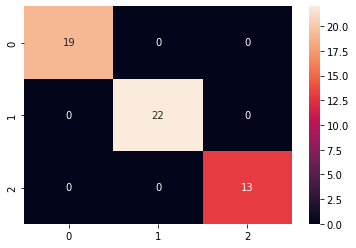

In [33]:
#Visualize the confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
sns.heatmap(cm, annot=True)
plt.show()